In [1]:
import torch
import torch.nn.functional as F
import utils
from importlib import reload
reload(utils)

<module 'utils' from '/home/amitaharoni/workspace/cv-sprint/models/utils.py'>

In [2]:
train_dl, valid_dl, test_dl = utils.make_tiny_imagenet_dataloaders()

In [11]:
class AlexNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            # 64x64 => 30x30
            torch.nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=2),
            torch.nn.BatchNorm2d(num_features=10),
            torch.nn.ReLU(),
            # 30x30 => 15x15
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # 15x15 => 13x13
            torch.nn.Conv2d(in_channels=10, out_channels=32, kernel_size=3),
            torch.nn.BatchNorm2d(num_features=32),
            torch.nn.ReLU(),
            # 13x13 => 6x6
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding='same'),
            torch.nn.BatchNorm2d(num_features=64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3, padding='same'),
            torch.nn.BatchNorm2d(num_features=96),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=96, out_channels=128, kernel_size=3, padding='same'),
            torch.nn.BatchNorm2d(num_features=128),
            torch.nn.ReLU(),
            # 6x6 => 3x3
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # 3x3x128 => 1152
            torch.nn.Flatten(),
            torch.nn.Linear(in_features=1152, out_features=512),
            torch.nn.BatchNorm1d(num_features=512),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(in_features=512, out_features=256),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(in_features=256, out_features=200),
        )

    def forward(self, x):
        return self.layers(x)

model = AlexNet()
model = model.to(utils.device)
model

AlexNet(
  (layers): Sequential(
    (0): Conv2d(3, 10, kernel_size=(5, 5), stride=(2, 2))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(10, 32, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (12): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (15): BatchNorm2d(128, eps=1e-05,

In [12]:
loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())

In [13]:
hist = utils.train_model(model, train_dl, valid_dl, loss_fn, optim, 
                         tensorboard_dir='../runs/01-alexnet', metrics=[utils.metric_accuracy],
                         epochs=1000,
                         patience=4)

100%|██████████| 157/157 [00:02<00:00, 72.01it/s]


Epoch 1/1000: train_loss=4.4388, train_accuracy=0.0804, val_loss=4.2068, val_accuracy=0.1065
Saving params from epoch 1. Best loss: 4.2068


100%|██████████| 157/157 [00:02<00:00, 76.30it/s] 


Epoch 2/1000: train_loss=3.8136, train_accuracy=0.1592, val_loss=3.8087, val_accuracy=0.1655
Saving params from epoch 2. Best loss: 3.8087


100%|██████████| 157/157 [00:02<00:00, 71.32it/s] 


Epoch 3/1000: train_loss=3.5387, train_accuracy=0.2047, val_loss=3.8128, val_accuracy=0.1764


100%|██████████| 157/157 [00:02<00:00, 63.82it/s]


Epoch 4/1000: train_loss=3.3357, train_accuracy=0.2407, val_loss=3.5714, val_accuracy=0.2070
Saving params from epoch 4. Best loss: 3.5714


100%|██████████| 157/157 [00:01<00:00, 135.49it/s]


Epoch 5/1000: train_loss=3.1562, train_accuracy=0.2707, val_loss=3.5780, val_accuracy=0.2154


100%|██████████| 157/157 [00:02<00:00, 57.56it/s]


Epoch 6/1000: train_loss=2.9889, train_accuracy=0.3001, val_loss=3.3786, val_accuracy=0.2429
Saving params from epoch 6. Best loss: 3.3786


100%|██████████| 157/157 [00:02<00:00, 77.44it/s] 


Epoch 7/1000: train_loss=2.8238, train_accuracy=0.3290, val_loss=3.3886, val_accuracy=0.2488


100%|██████████| 157/157 [00:02<00:00, 64.34it/s]


Epoch 8/1000: train_loss=2.6589, train_accuracy=0.3606, val_loss=3.5534, val_accuracy=0.2320


100%|██████████| 157/157 [00:02<00:00, 62.66it/s]


Epoch 9/1000: train_loss=2.4936, train_accuracy=0.3902, val_loss=3.7209, val_accuracy=0.2276


100%|██████████| 157/157 [00:02<00:00, 63.80it/s]


Epoch 10/1000: train_loss=2.3167, train_accuracy=0.4233, val_loss=3.4999, val_accuracy=0.2602
Loading model params from epoch 6


In [14]:
utils.evaluate_model(model, test_dl, loss_fn, metrics=[utils.metric_accuracy])

{'loss': 3.3506495143890382, 'accuracy': 0.2486}

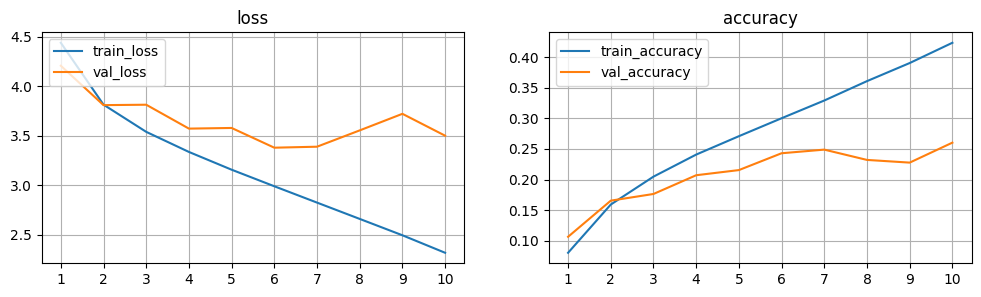

In [15]:
utils.plot_metrics(hist)

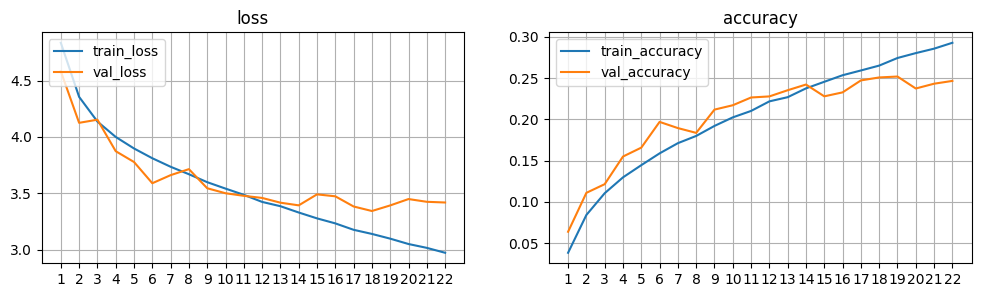

In [9]:
utils.plot_metrics(hist)

In [5]:
class ReferenceAlexNet(torch.nn.Module):
    def __init__(self, dropout: float = 0.5) -> None:
        super().__init__()
        self.features = torch.nn.Sequential(
            # 64x64->58x58
            torch.nn.Conv2d(3, 64, kernel_size=7),
            torch.nn.ReLU(inplace=True),
            # 58x58->28x28
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            # 28x28->28x28
            torch.nn.Conv2d(64, 192, kernel_size=5, padding=2),
            torch.nn.ReLU(inplace=True),
            # 28x28->13x13
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            # 13x13->13x13
            torch.nn.Conv2d(192, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            # 13x13->13x13
            torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            # 13x13->13x13
            torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            # torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(p=dropout),
            torch.nn.Linear(256 * 6 * 6, 512),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(p=dropout),
            torch.nn.Linear(512, 256),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(256, 200),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
    
ref_model = ReferenceAlexNet().to(utils.device)
ref_model

ReferenceAlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=512, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=5

In [6]:
loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(ref_model.parameters())
hist = utils.train_model(ref_model, train_dl, valid_dl, loss_fn, optim, 
                         tensorboard_dir='../runs/01-ref-alexnet', metrics=[utils.metric_accuracy],
                         epochs=1000,
                         patience=4)

100%|██████████| 157/157 [00:05<00:00, 29.77it/s]


Epoch 1/1000: train_loss=5.0909, train_accuracy=0.0161, val_loss=4.9122, val_accuracy=0.0261
Saving params from epoch 1. Best loss: 4.9122


100%|██████████| 157/157 [00:05<00:00, 29.45it/s]


Epoch 2/1000: train_loss=4.7264, train_accuracy=0.0436, val_loss=4.5246, val_accuracy=0.0640
Saving params from epoch 2. Best loss: 4.5246


100%|██████████| 157/157 [00:05<00:00, 29.51it/s]


Epoch 3/1000: train_loss=4.4238, train_accuracy=0.0735, val_loss=4.2129, val_accuracy=0.0989
Saving params from epoch 3. Best loss: 4.2129


100%|██████████| 157/157 [00:05<00:00, 29.89it/s]


Epoch 4/1000: train_loss=4.2298, train_accuracy=0.0969, val_loss=4.0595, val_accuracy=0.1228
Saving params from epoch 4. Best loss: 4.0595


100%|██████████| 157/157 [00:05<00:00, 30.36it/s]


Epoch 5/1000: train_loss=4.0846, train_accuracy=0.1171, val_loss=3.9081, val_accuracy=0.1424
Saving params from epoch 5. Best loss: 3.9081


100%|██████████| 157/157 [00:05<00:00, 29.79it/s]


Epoch 6/1000: train_loss=3.9673, train_accuracy=0.1343, val_loss=3.8651, val_accuracy=0.1514
Saving params from epoch 6. Best loss: 3.8651


100%|██████████| 157/157 [00:05<00:00, 31.17it/s]


Epoch 7/1000: train_loss=3.8758, train_accuracy=0.1472, val_loss=3.7634, val_accuracy=0.1647
Saving params from epoch 7. Best loss: 3.7634


100%|██████████| 157/157 [00:05<00:00, 30.41it/s]


Epoch 8/1000: train_loss=3.7960, train_accuracy=0.1588, val_loss=3.7220, val_accuracy=0.1786
Saving params from epoch 8. Best loss: 3.7220


100%|██████████| 157/157 [00:05<00:00, 30.32it/s]


Epoch 9/1000: train_loss=3.7391, train_accuracy=0.1693, val_loss=3.7078, val_accuracy=0.1750
Saving params from epoch 9. Best loss: 3.7078


100%|██████████| 157/157 [00:05<00:00, 30.06it/s]


Epoch 10/1000: train_loss=3.6855, train_accuracy=0.1769, val_loss=3.6404, val_accuracy=0.1912
Saving params from epoch 10. Best loss: 3.6404


100%|██████████| 157/157 [00:05<00:00, 31.22it/s]


Epoch 11/1000: train_loss=3.6276, train_accuracy=0.1860, val_loss=3.7502, val_accuracy=0.1773


100%|██████████| 157/157 [00:05<00:00, 29.95it/s]


Epoch 12/1000: train_loss=3.5841, train_accuracy=0.1929, val_loss=3.5911, val_accuracy=0.1987
Saving params from epoch 12. Best loss: 3.5911


100%|██████████| 157/157 [00:05<00:00, 28.66it/s]


Epoch 13/1000: train_loss=3.5342, train_accuracy=0.2010, val_loss=3.6286, val_accuracy=0.1914


100%|██████████| 157/157 [00:05<00:00, 30.60it/s]


Epoch 14/1000: train_loss=3.5007, train_accuracy=0.2038, val_loss=3.6267, val_accuracy=0.1902


100%|██████████| 157/157 [00:05<00:00, 29.71it/s]


Epoch 15/1000: train_loss=3.4566, train_accuracy=0.2127, val_loss=3.5704, val_accuracy=0.2023
Saving params from epoch 15. Best loss: 3.5704


100%|██████████| 157/157 [00:05<00:00, 30.18it/s]


Epoch 16/1000: train_loss=3.4243, train_accuracy=0.2159, val_loss=3.5146, val_accuracy=0.2092
Saving params from epoch 16. Best loss: 3.5146


100%|██████████| 157/157 [00:05<00:00, 31.13it/s]


Epoch 17/1000: train_loss=3.3884, train_accuracy=0.2238, val_loss=3.5223, val_accuracy=0.2097


100%|██████████| 157/157 [00:05<00:00, 29.16it/s]


Epoch 18/1000: train_loss=3.3575, train_accuracy=0.2293, val_loss=3.5025, val_accuracy=0.2163
Saving params from epoch 18. Best loss: 3.5025


100%|██████████| 157/157 [00:05<00:00, 30.48it/s]


Epoch 19/1000: train_loss=3.3261, train_accuracy=0.2325, val_loss=3.5413, val_accuracy=0.2112


100%|██████████| 157/157 [00:05<00:00, 30.89it/s]


Epoch 20/1000: train_loss=3.3080, train_accuracy=0.2350, val_loss=3.4970, val_accuracy=0.2165
Saving params from epoch 20. Best loss: 3.4970


100%|██████████| 157/157 [00:05<00:00, 28.46it/s]


Epoch 21/1000: train_loss=3.2729, train_accuracy=0.2430, val_loss=3.5274, val_accuracy=0.2124


100%|██████████| 157/157 [00:05<00:00, 28.54it/s]


Epoch 22/1000: train_loss=3.2724, train_accuracy=0.2427, val_loss=3.5206, val_accuracy=0.2173


100%|██████████| 157/157 [00:05<00:00, 28.94it/s]


Epoch 23/1000: train_loss=3.2429, train_accuracy=0.2471, val_loss=3.4686, val_accuracy=0.2235
Saving params from epoch 23. Best loss: 3.4686


100%|██████████| 157/157 [00:05<00:00, 30.17it/s]


Epoch 24/1000: train_loss=3.2152, train_accuracy=0.2501, val_loss=3.4637, val_accuracy=0.2199
Saving params from epoch 24. Best loss: 3.4637


100%|██████████| 157/157 [00:05<00:00, 28.04it/s]


Epoch 25/1000: train_loss=3.1910, train_accuracy=0.2556, val_loss=3.4554, val_accuracy=0.2284
Saving params from epoch 25. Best loss: 3.4554


100%|██████████| 157/157 [00:06<00:00, 25.31it/s]


Epoch 26/1000: train_loss=3.1683, train_accuracy=0.2572, val_loss=3.5311, val_accuracy=0.2114


100%|██████████| 157/157 [00:04<00:00, 31.50it/s]


Epoch 27/1000: train_loss=3.1642, train_accuracy=0.2605, val_loss=3.4975, val_accuracy=0.2182


100%|██████████| 157/157 [00:05<00:00, 31.10it/s]


Epoch 28/1000: train_loss=3.1437, train_accuracy=0.2639, val_loss=3.4977, val_accuracy=0.2199


100%|██████████| 157/157 [00:05<00:00, 30.14it/s]


Epoch 29/1000: train_loss=3.1198, train_accuracy=0.2679, val_loss=3.5565, val_accuracy=0.2164
Loading model params from epoch 25


In [7]:
utils.evaluate_model(ref_model, test_dl, loss_fn, metrics=[utils.metric_accuracy])

{'loss': 3.475049243927002, 'accuracy': 0.2244}

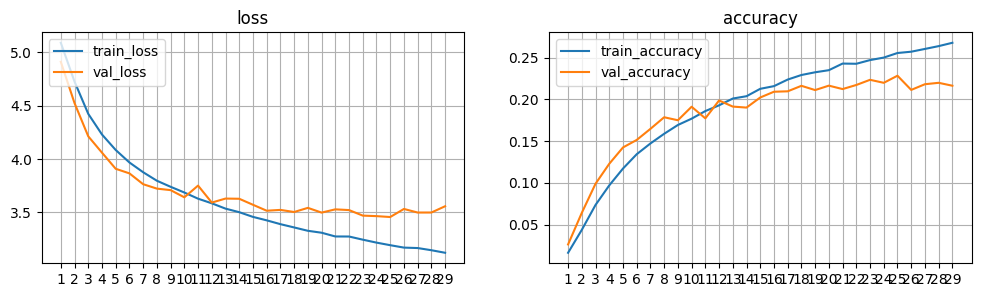

In [8]:
utils.plot_metrics(hist)